In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
diabetes_rates_test = pd.read_csv('us_county_diabetes_rates.csv')
diabetes_rates_test
# percentage, lower limit, upper limit of adults aged 20+ diagnosed with diabetes 
# data as of 2021, but all of Florida, and some other counties have 'No Data'
# going to impute previous year (2020) for 2021 data for all missing counties -- will see how much is needed

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Clifton Forge City,Virginia,51560,No Data,No Data,No Data
1,Bedford City,Virginia,51515,No Data,No Data,No Data
2,Shannon County,South Dakota,46113,No Data,No Data,No Data
3,Washington County,Florida,12133,No Data,No Data,No Data
4,Walton County,Florida,12131,No Data,No Data,No Data
...,...,...,...,...,...,...
3146,Oglala Lakota County,South Dakota,46102,15.4,12.7,18.4
3147,Holmes County,Mississippi,28051,15.5,11.1,19.5
3148,Portsmouth City,Virginia,51740,16.8,13.7,20.2
3149,Williamsburg County,South Carolina,45089,17.5,14.5,20.9


In [5]:
diabetes_rates_test = diabetes_rates_test.replace('No Data', np.nan)

In [6]:
diabetes_rates_test['no_percentage'] = (diabetes_rates_test['Percentage'].isna())
diabetes_rates_test[(diabetes_rates_test['no_percentage'] == True) & (diabetes_rates_test['State'] == 'Florida')] # all counties of florida are null

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,no_percentage
3,Washington County,Florida,12133,NaN,NaN,NaN,True
4,Walton County,Florida,12131,NaN,NaN,NaN,True
5,Wakulla County,Florida,12129,NaN,NaN,NaN,True
6,Volusia County,Florida,12127,NaN,NaN,NaN,True
7,Union County,Florida,12125,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...
65,Brevard County,Florida,12009,NaN,NaN,NaN,True
66,Bradford County,Florida,12007,NaN,NaN,NaN,True
67,Bay County,Florida,12005,NaN,NaN,NaN,True
68,Baker County,Florida,12003,NaN,NaN,NaN,True


In [7]:
flo = pd.read_csv('flo_2020_diabetes.csv')
sum(flo['Percentage'].isna())

0

In [8]:
d_test = diabetes_rates_test.dropna()
d_test['Percentage_int'] = pd.to_numeric(d_test['Percentage'])

/var/folders/vk/kfflzmxs1ssf_t7swsphkgd00000gn/T/ipykernel_17402/88707711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_test['Percentage_int'] = pd.to_numeric(d_test['Percentage'])


In [9]:
d_test

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,no_percentage,Percentage_int
75,Teton County,Wyoming,56039,4.4,3.1,6,False,4.4
76,Gallatin County,Montana,30031,4.7,3.5,6,False,4.7
77,San Juan County,Washington,53055,4.7,3.2,6.1,False,4.7
78,Summit County,Colorado,8117,5.1,3.5,7.2,False,5.1
79,Blaine County,Idaho,16013,5.1,3.6,7,False,5.1
...,...,...,...,...,...,...,...,...
3146,Oglala Lakota County,South Dakota,46102,15.4,12.7,18.4,False,15.4
3147,Holmes County,Mississippi,28051,15.5,11.1,19.5,False,15.5
3148,Portsmouth City,Virginia,51740,16.8,13.7,20.2,False,16.8
3149,Williamsburg County,South Carolina,45089,17.5,14.5,20.9,False,17.5


<Axes: >

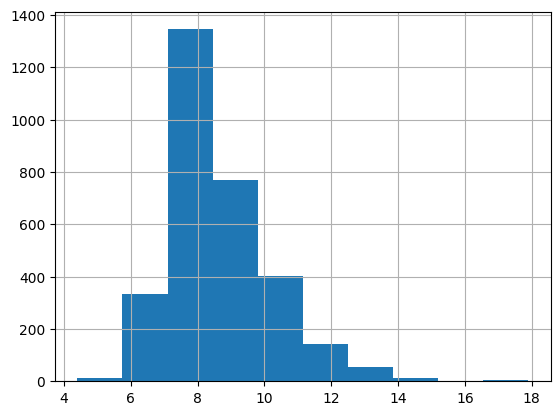

In [10]:
d_test['Percentage_int'].hist()

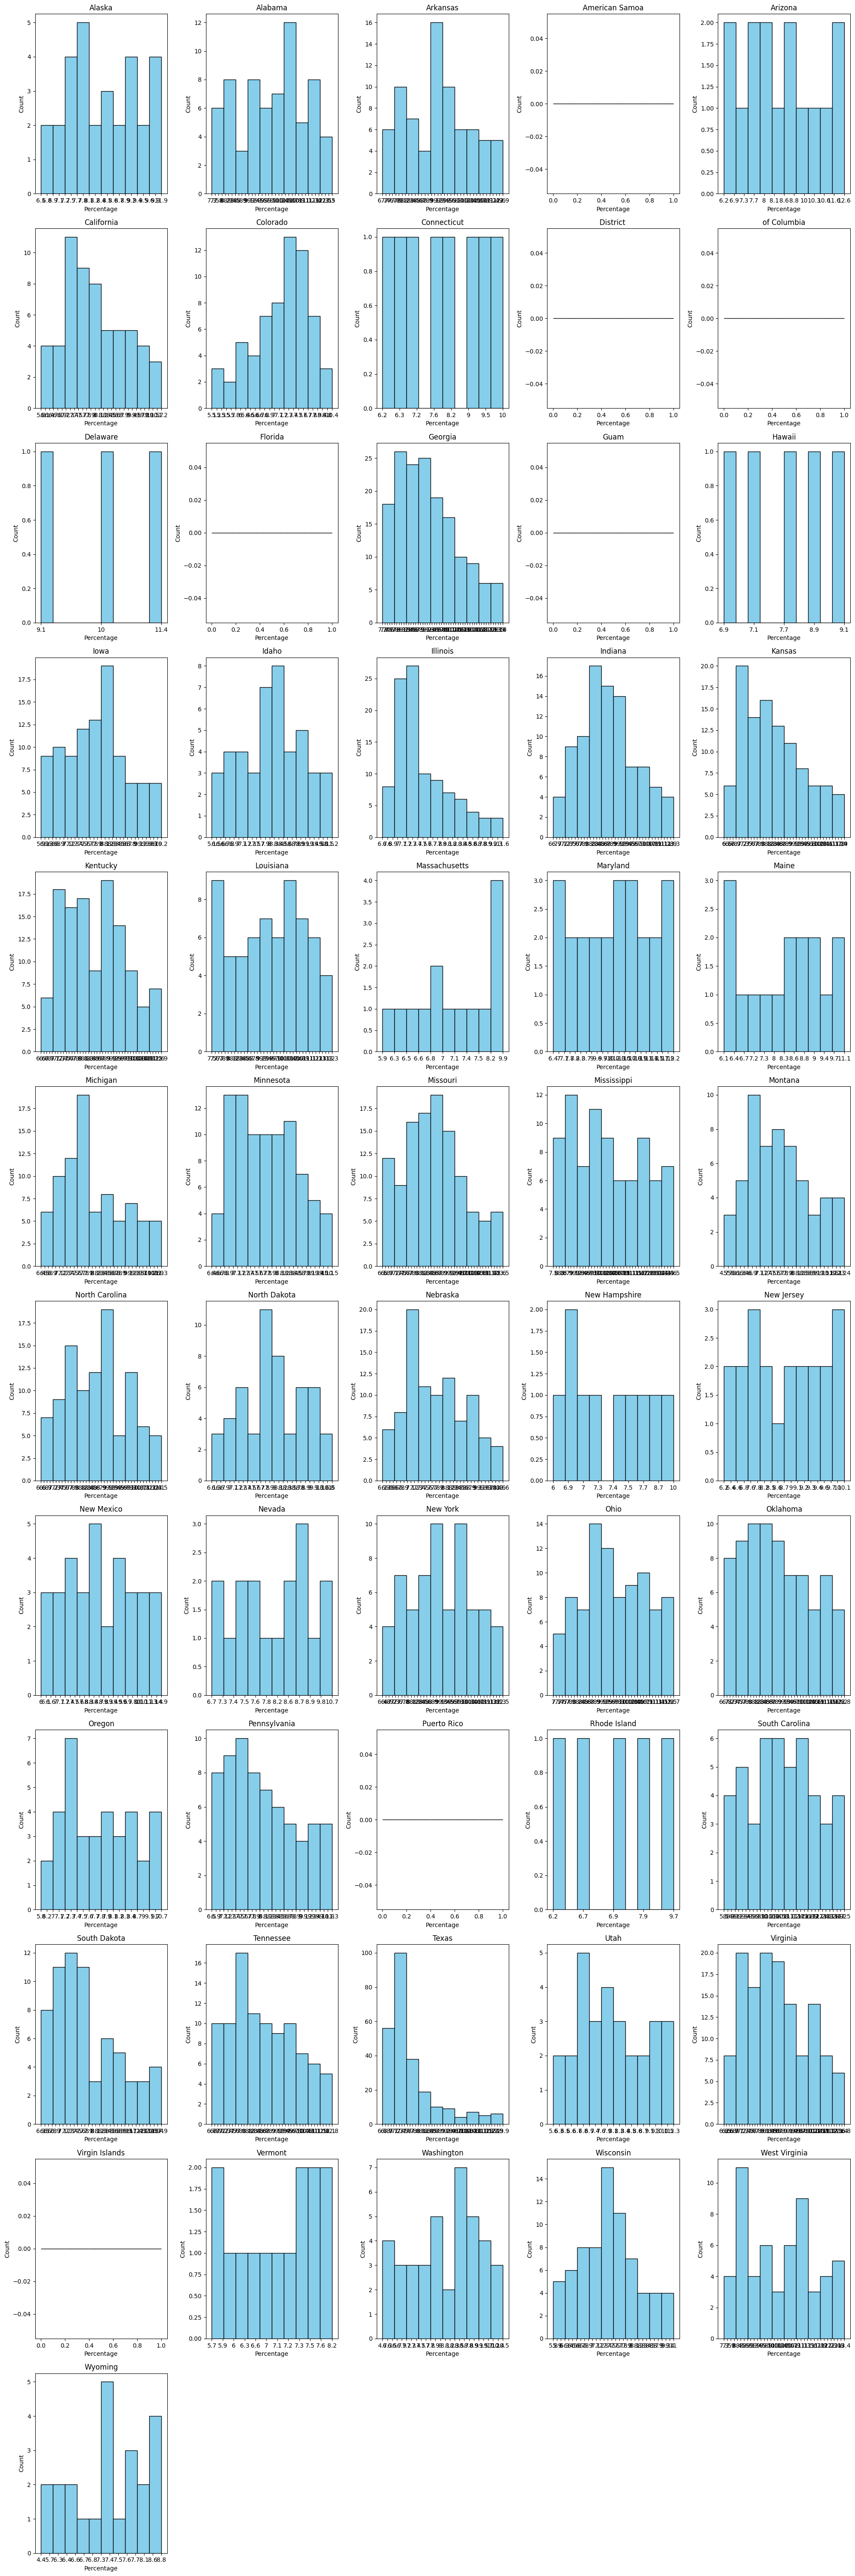

In [11]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

#pasted from norcal82's github -- thanks! 

# for s in state_names:
#     plt.figure()
#     d_state = d_test[d_test['State'] == s]
#     plt.hist(d_state['Percentage'])
#     plt.show()
# Fixed number of columns
cols = 5
rows = -(-len(state_names) // cols)  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, s in enumerate(state_names):
    ax = axes[i]
    d_state = d_test[d_test['State'] == s]
    ax.hist(d_state['Percentage'], bins=10, color='skyblue', edgecolor='black')
    ax.set_title(s)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('Count')

# Hide unused axes
for j in range(len(state_names), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

    

In [12]:
employement = pd.read_csv('Unemployment2023.csv')
employement

,FIPS_Code,State,Area_Name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,142601576.0
1,0,US,United States,Employed_2000,136904853.0
2,0,US,United States,Unemployed_2000,5696723.0
3,0,US,United States,Unemployment_rate_2000,4.0
4,0,US,United States,Civilian_labor_force_2001,143786537.0
...,...,...,...,...,...
329721,72153,PR,"Yauco Municipio, PR",Unemployment_rate_2022,10.3
329722,72153,PR,"Yauco Municipio, PR",Civilian_labor_force_2023,10488.0
329723,72153,PR,"Yauco Municipio, PR",Employed_2023,9278.0
329724,72153,PR,"Yauco Municipio, PR",Unemployed_2023,1210.0


(array([1.660e+02, 1.012e+03, 1.198e+03, 5.240e+02, 1.690e+02, 7.000e+01,
        3.600e+01, 1.400e+01, 5.000e+00, 1.000e+00]),
 array([ 28972. ,  42835.3,  56698.6,  70561.9,  84425.2,  98288.5,
        112151.8, 126015.1, 139878.4, 153741.7, 167605. ]),
 <BarContainer object of 10 artists>)

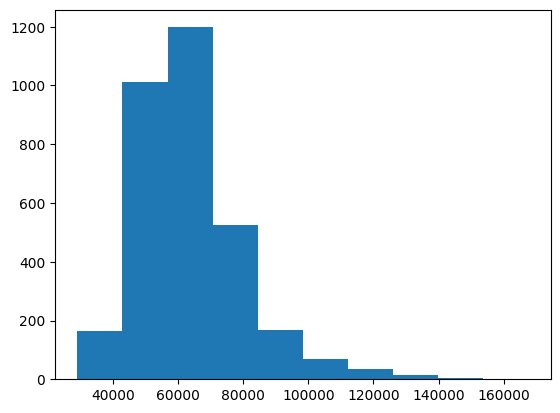

In [13]:
# income_national = income[income['State'] == 'US']
# df_nat_income = pd.DataFrame(income_national)
# df_nat_income
income_only = employement[employement['Attribute'].str.contains(r'Median_Household_Income_\d{4}', regex=True)]
grouped = income_only.groupby('FIPS_Code').agg({
    'State': 'first',
    'Area_Name': 'first',
    'Attribute': 'first',
    'Value': 'sum'  # or mean, depending on your goal
}).reset_index()

plt.hist(income_only['Value'])


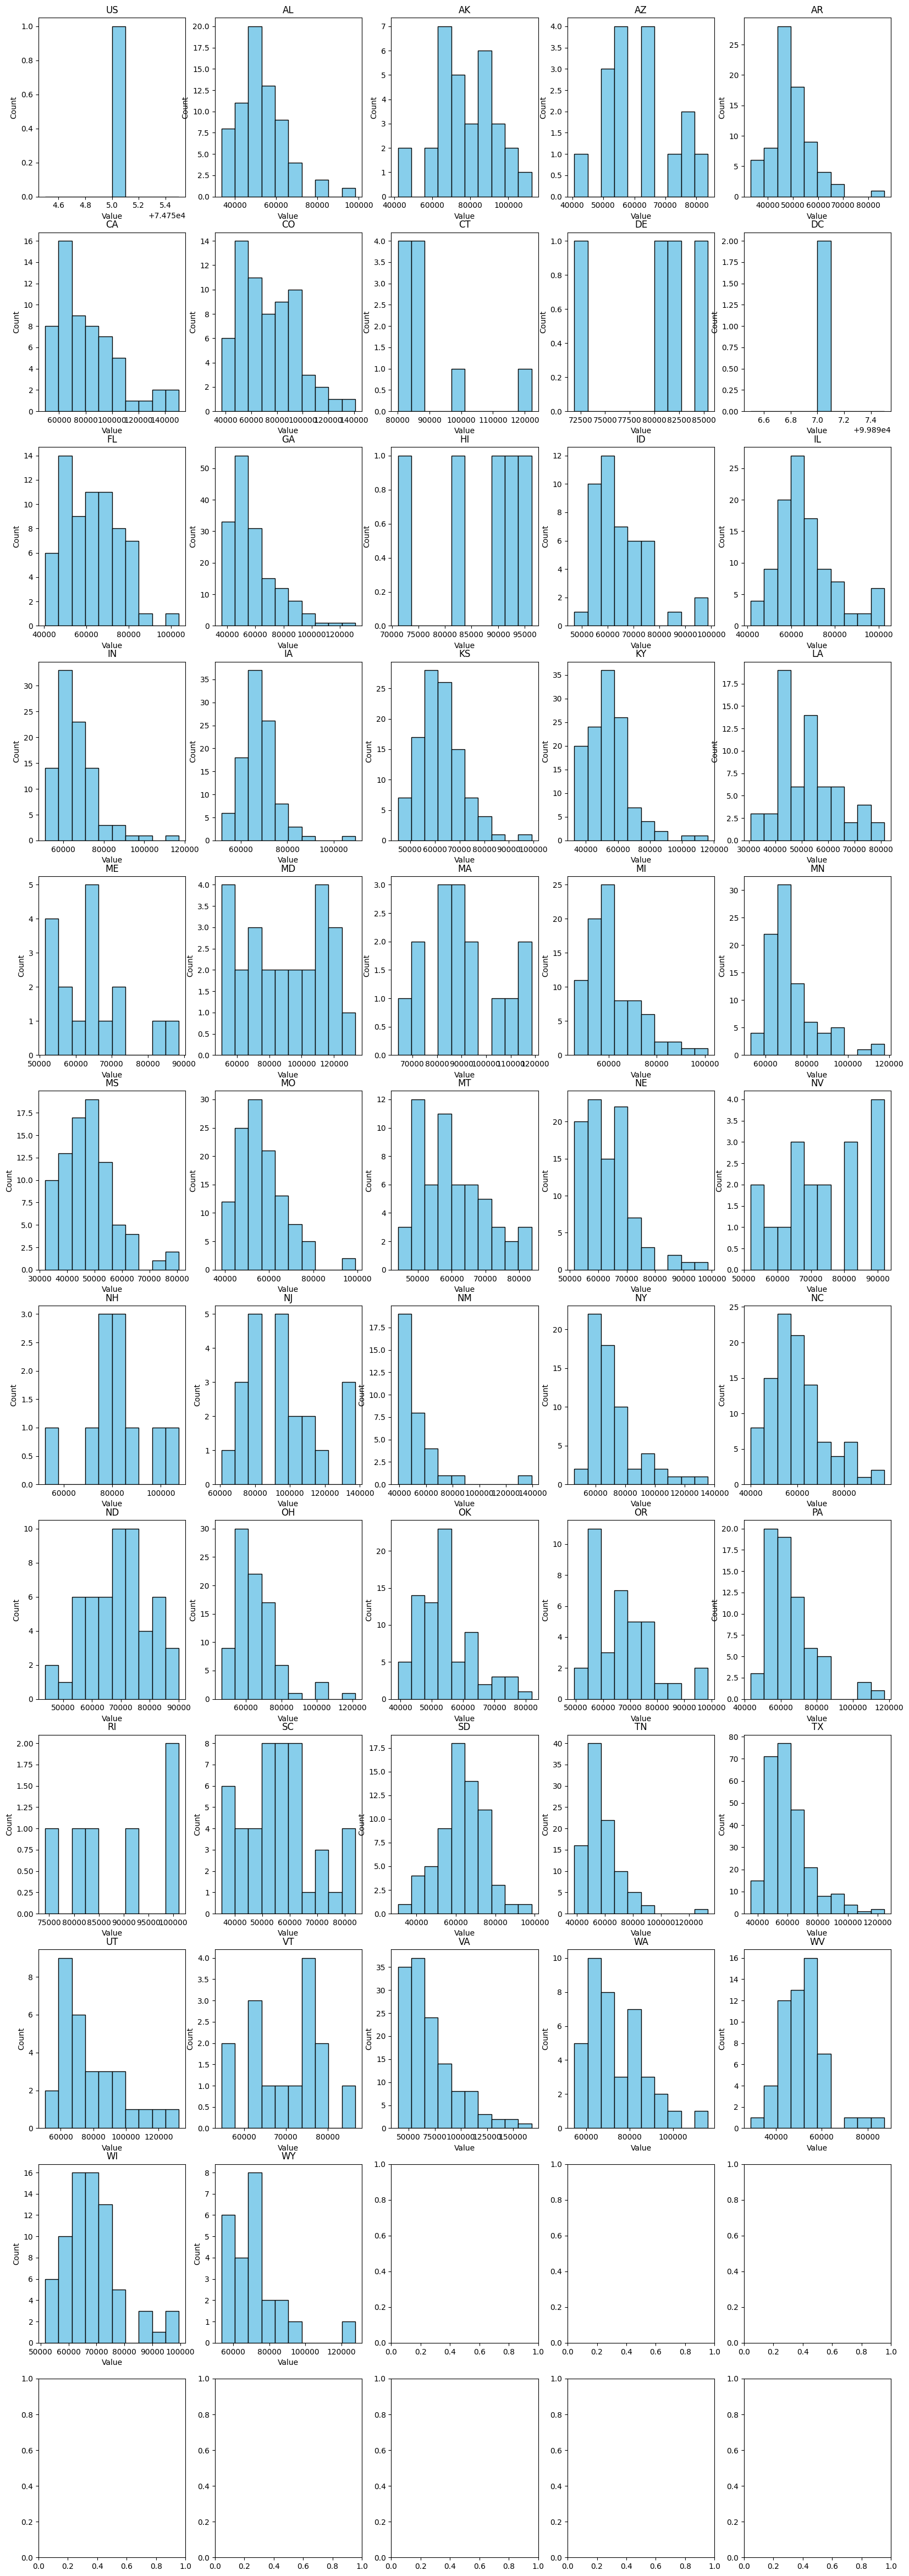

In [14]:
list_states = income_only['State'].unique()
list_states
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, s in enumerate(list_states):
    ax = axes[i]
    counts = income_only[income_only['State'] == s]
    ax.hist(counts['Value'], bins=10, color='skyblue', edgecolor='black')
    ax.set_title(s)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
plt.show()

In [15]:
regions = pd.read_csv('regions.csv')
regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [16]:
diabetes_grouped = d_test[['State','Percentage_int']].groupby("State").mean()
# # merged = d_test.join(regions, on='State')
# diabetes_grouped = d_test.groupby('State').agg({
#     'County	': 'first',
#     'Area_Name': 'first',
#     'Attribute': 'first',
#     'Value': 'sum'  # or mean, depending on your goal
# }).reset_index()
joined = regions.join(diabetes_grouped, on='State')
joined

,State,State Code,Region,Division,Percentage_int
0,Alaska,AK,West,Pacific,8.346667
1,Alabama,AL,South,East South Central,10.010448
2,Arkansas,AR,South,West South Central,9.317333
3,Arizona,AZ,West,Mountain,8.826667
4,California,CA,West,Pacific,8.058621
5,Colorado,CO,West,Mountain,7.117188
6,Connecticut,CT,Northeast,New England,8.000000
7,District of Columbia,DC,South,South Atlantic,7.900000
8,Delaware,DE,South,South Atlantic,10.166667
9,Florida,FL,South,South Atlantic,NaN


In [17]:
pip install geopandas


[notice] A new release of pip is available: 23.1.2 -> 25.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


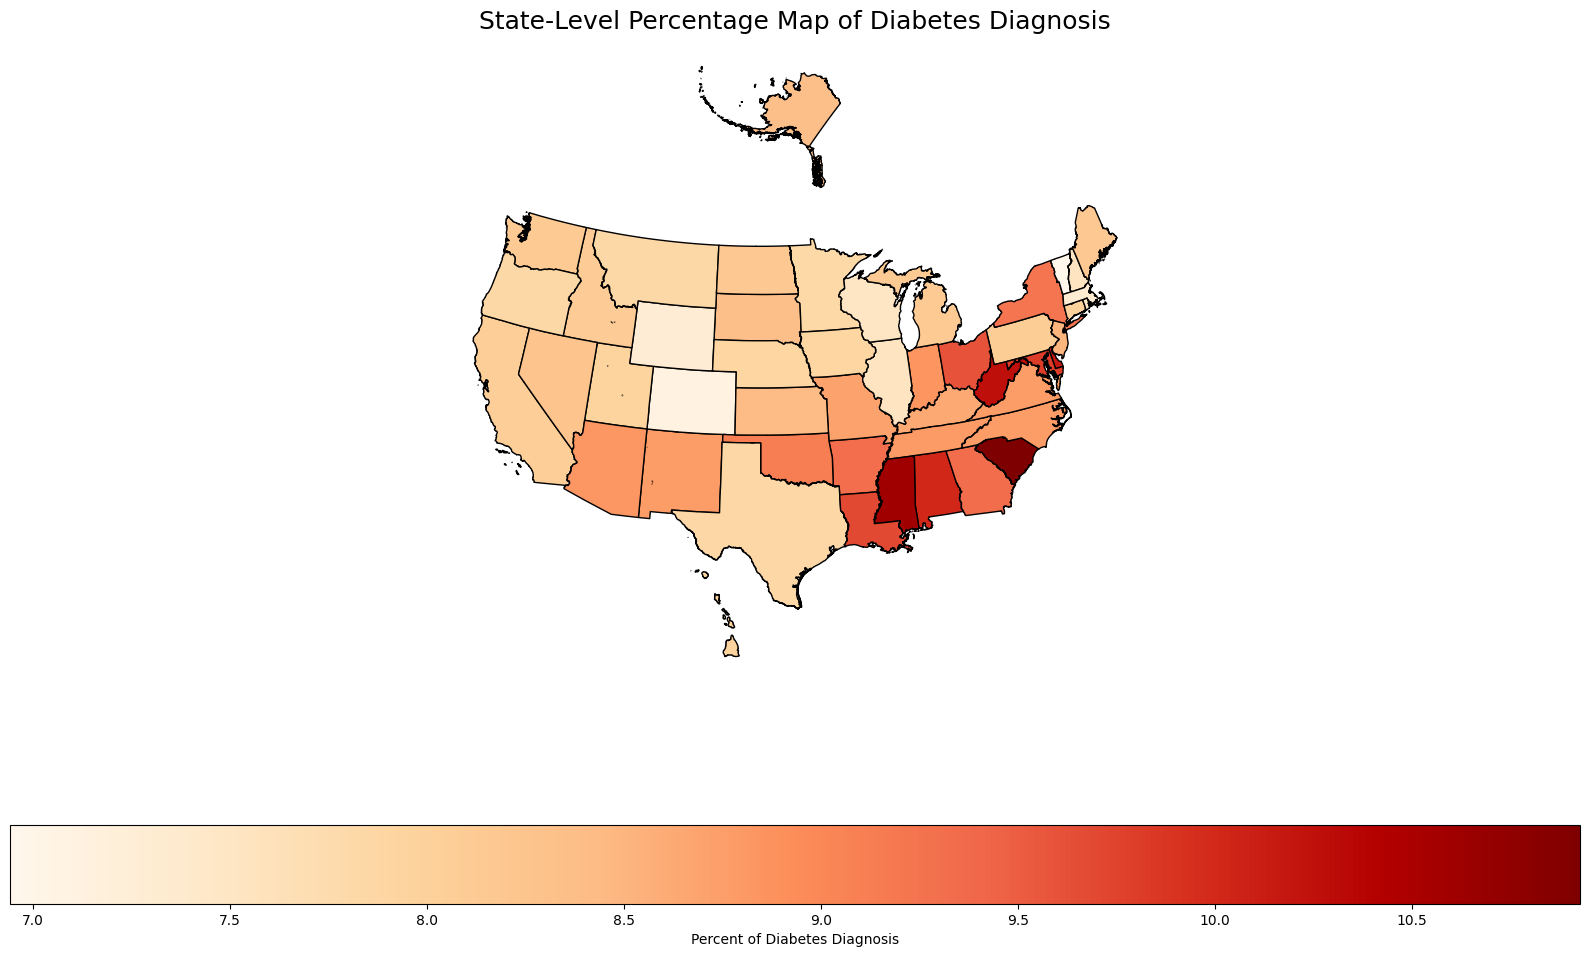

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
#
# Load the US state shapefile
gdf_states = gpd.read_file('/cb_2022_us_state_500k/cb_2022_us_state_500k.shp')

# Merge with your data
gdf_states = gdf_states.merge(joined, how='left', left_on='STUSPS', right_on='State Code')

# Exclude territories not needed
gdf_states = gdf_states[~gdf_states['STUSPS'].isin(['PR', 'GU', 'VI', 'MP', 'AS'])]

# Separate out Alaska and Hawaii
alaska = gdf_states[gdf_states['STUSPS'] == 'AK'].copy()
hawaii = gdf_states[gdf_states['STUSPS'] == 'HI'].copy()
continental = gdf_states[~gdf_states['STUSPS'].isin(['AK', 'HI'])].copy()

# Project to a coordinate system suitable for transformations
gdf_states = gdf_states.to_crs("EPSG:2163")
continental = continental.to_crs("EPSG:2163")
alaska = alaska.to_crs("EPSG:2163")
hawaii = hawaii.to_crs("EPSG:2163")

# Transform Alaska: scale and move
alaska.geometry = alaska.geometry.scale(xfact=0.35, yfact=0.35, origin='center')
alaska.geometry = alaska.geometry.translate(xoff=3e6, yoff=-1.4e6)

# Transform Hawaii: scale and move
hawaii.geometry = hawaii.geometry.translate(xoff=5.3e6, yoff=-1.4e6)

# Combine all
adjusted = pd.concat([continental, alaska, hawaii])

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
adjusted.plot(column='Percentage_int', cmap='OrRd', ax=ax, edgecolor='black', legend=True,
              legend_kwds={'label': "Percent of Diabetes Diagnosis", 'orientation': "horizontal"})
plt.title('State-Level Percentage Map of Diabetes Diagnosis', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


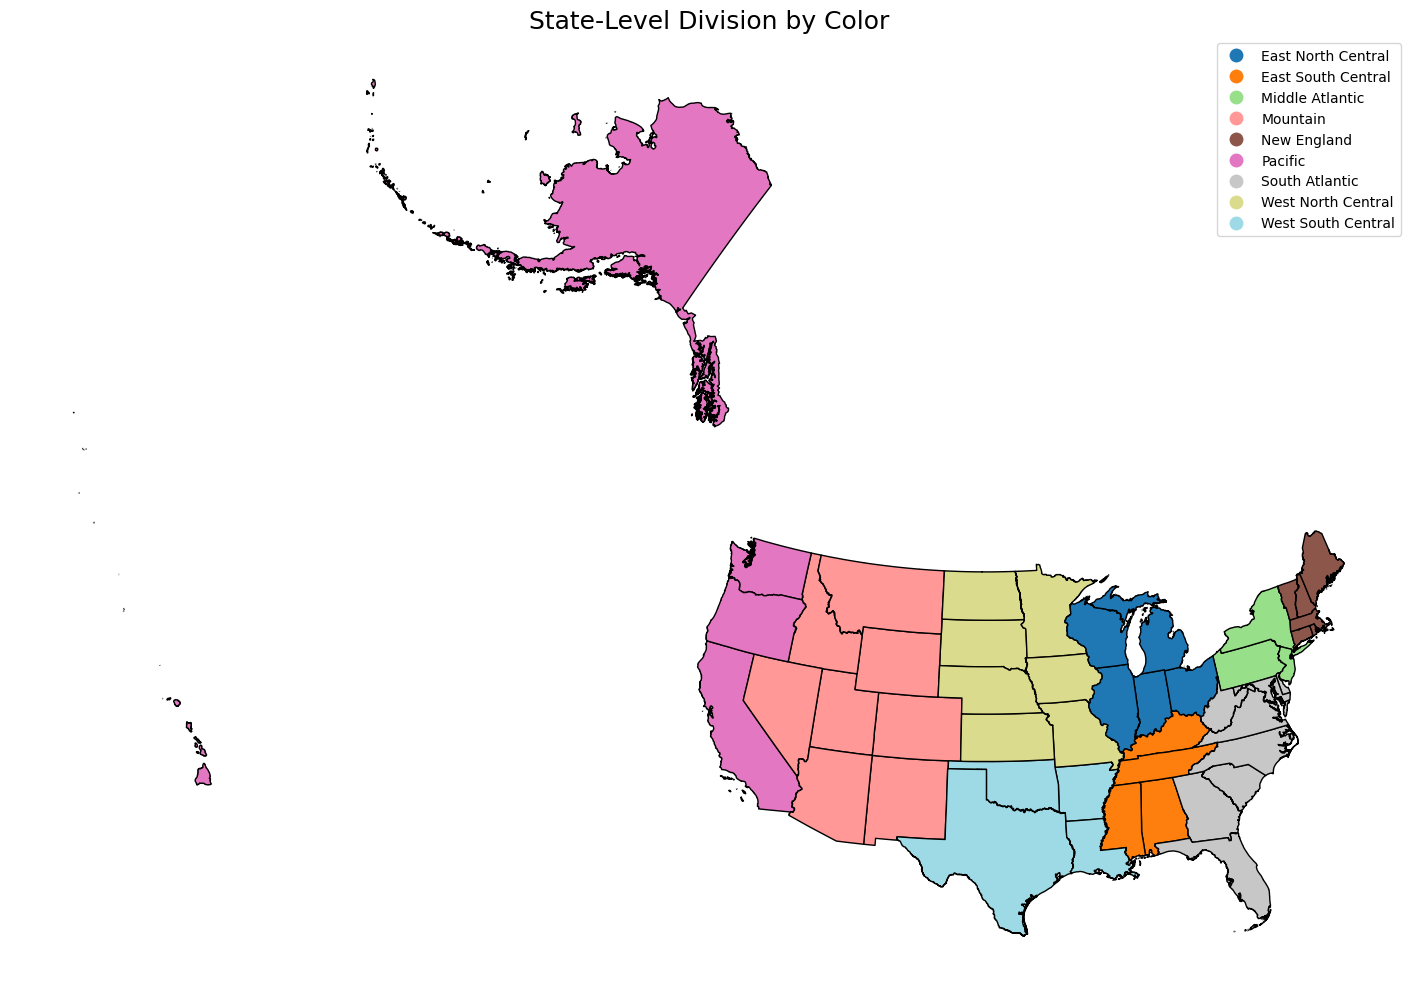

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the US state shapefile
gdf_states = gpd.read_file('cb_2022_us_state_500k/cb_2022_us_state_500k.shp')

# Merge with your data (replace 'joined' with your actual DataFrame name)
gdf_states = gdf_states.merge(joined, how='left', left_on='STUSPS', right_on='State Code')

# Exclude territories not needed
gdf_states = gdf_states[~gdf_states['STUSPS'].isin(['PR', 'GU', 'VI', 'MP', 'AS'])]

# Separate out Alaska and Hawaii
alaska = gdf_states[gdf_states['STUSPS'] == 'AK'].copy()
hawaii = gdf_states[gdf_states['STUSPS'] == 'HI'].copy()
continental = gdf_states[~gdf_states['STUSPS'].isin(['AK', 'HI'])].copy()

# Project to a coordinate system suitable for transformations
gdf_states = gdf_states.to_crs("EPSG:2163")
continental = continental.to_crs("EPSG:2163")
alaska = alaska.to_crs("EPSG:2163")
hawaii = hawaii.to_crs("EPSG:2163")

# Transform Alaska: scale and move
alaska.geometry = alaska.geometry.scale(xfact=0.35, yfact=0.35, origin='center')
alaska.geometry = alaska.geometry.translate(xoff=3e6, yoff=-1.4e6)

# Transform Hawaii: scale and move
hawaii.geometry = hawaii.geometry.translate(xoff=5.3e6, yoff=-1.4e6)

# Combine all
adjusted = pd.concat([continental, alaska, hawaii])

# Plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot each region with its respective color
gdf_states.plot(column='Division', cmap='tab20', ax=ax, edgecolor='black', legend=True)

# Add title and remove axis
plt.title('State-Level Division by Color', fontsize=18)
plt.axis('off')

# Adjust legend (This is where the previous mistake happened)
# The legend is now automatically generated based on the column, so we can set it up properly here
legend = ax.get_legend()

legend.set_bbox_to_anchor((1, 1))  # Adjust the legend's position

# Tight layout to ensure no clipping
plt.tight_layout()
plt.show()


/var/folders/vk/kfflzmxs1ssf_t7swsphkgd00000gn/T/ipykernel_17402/2610504399.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_test['CountyFIPS'] = d_test['CountyFIPS'].astype(str).str.zfill(5)


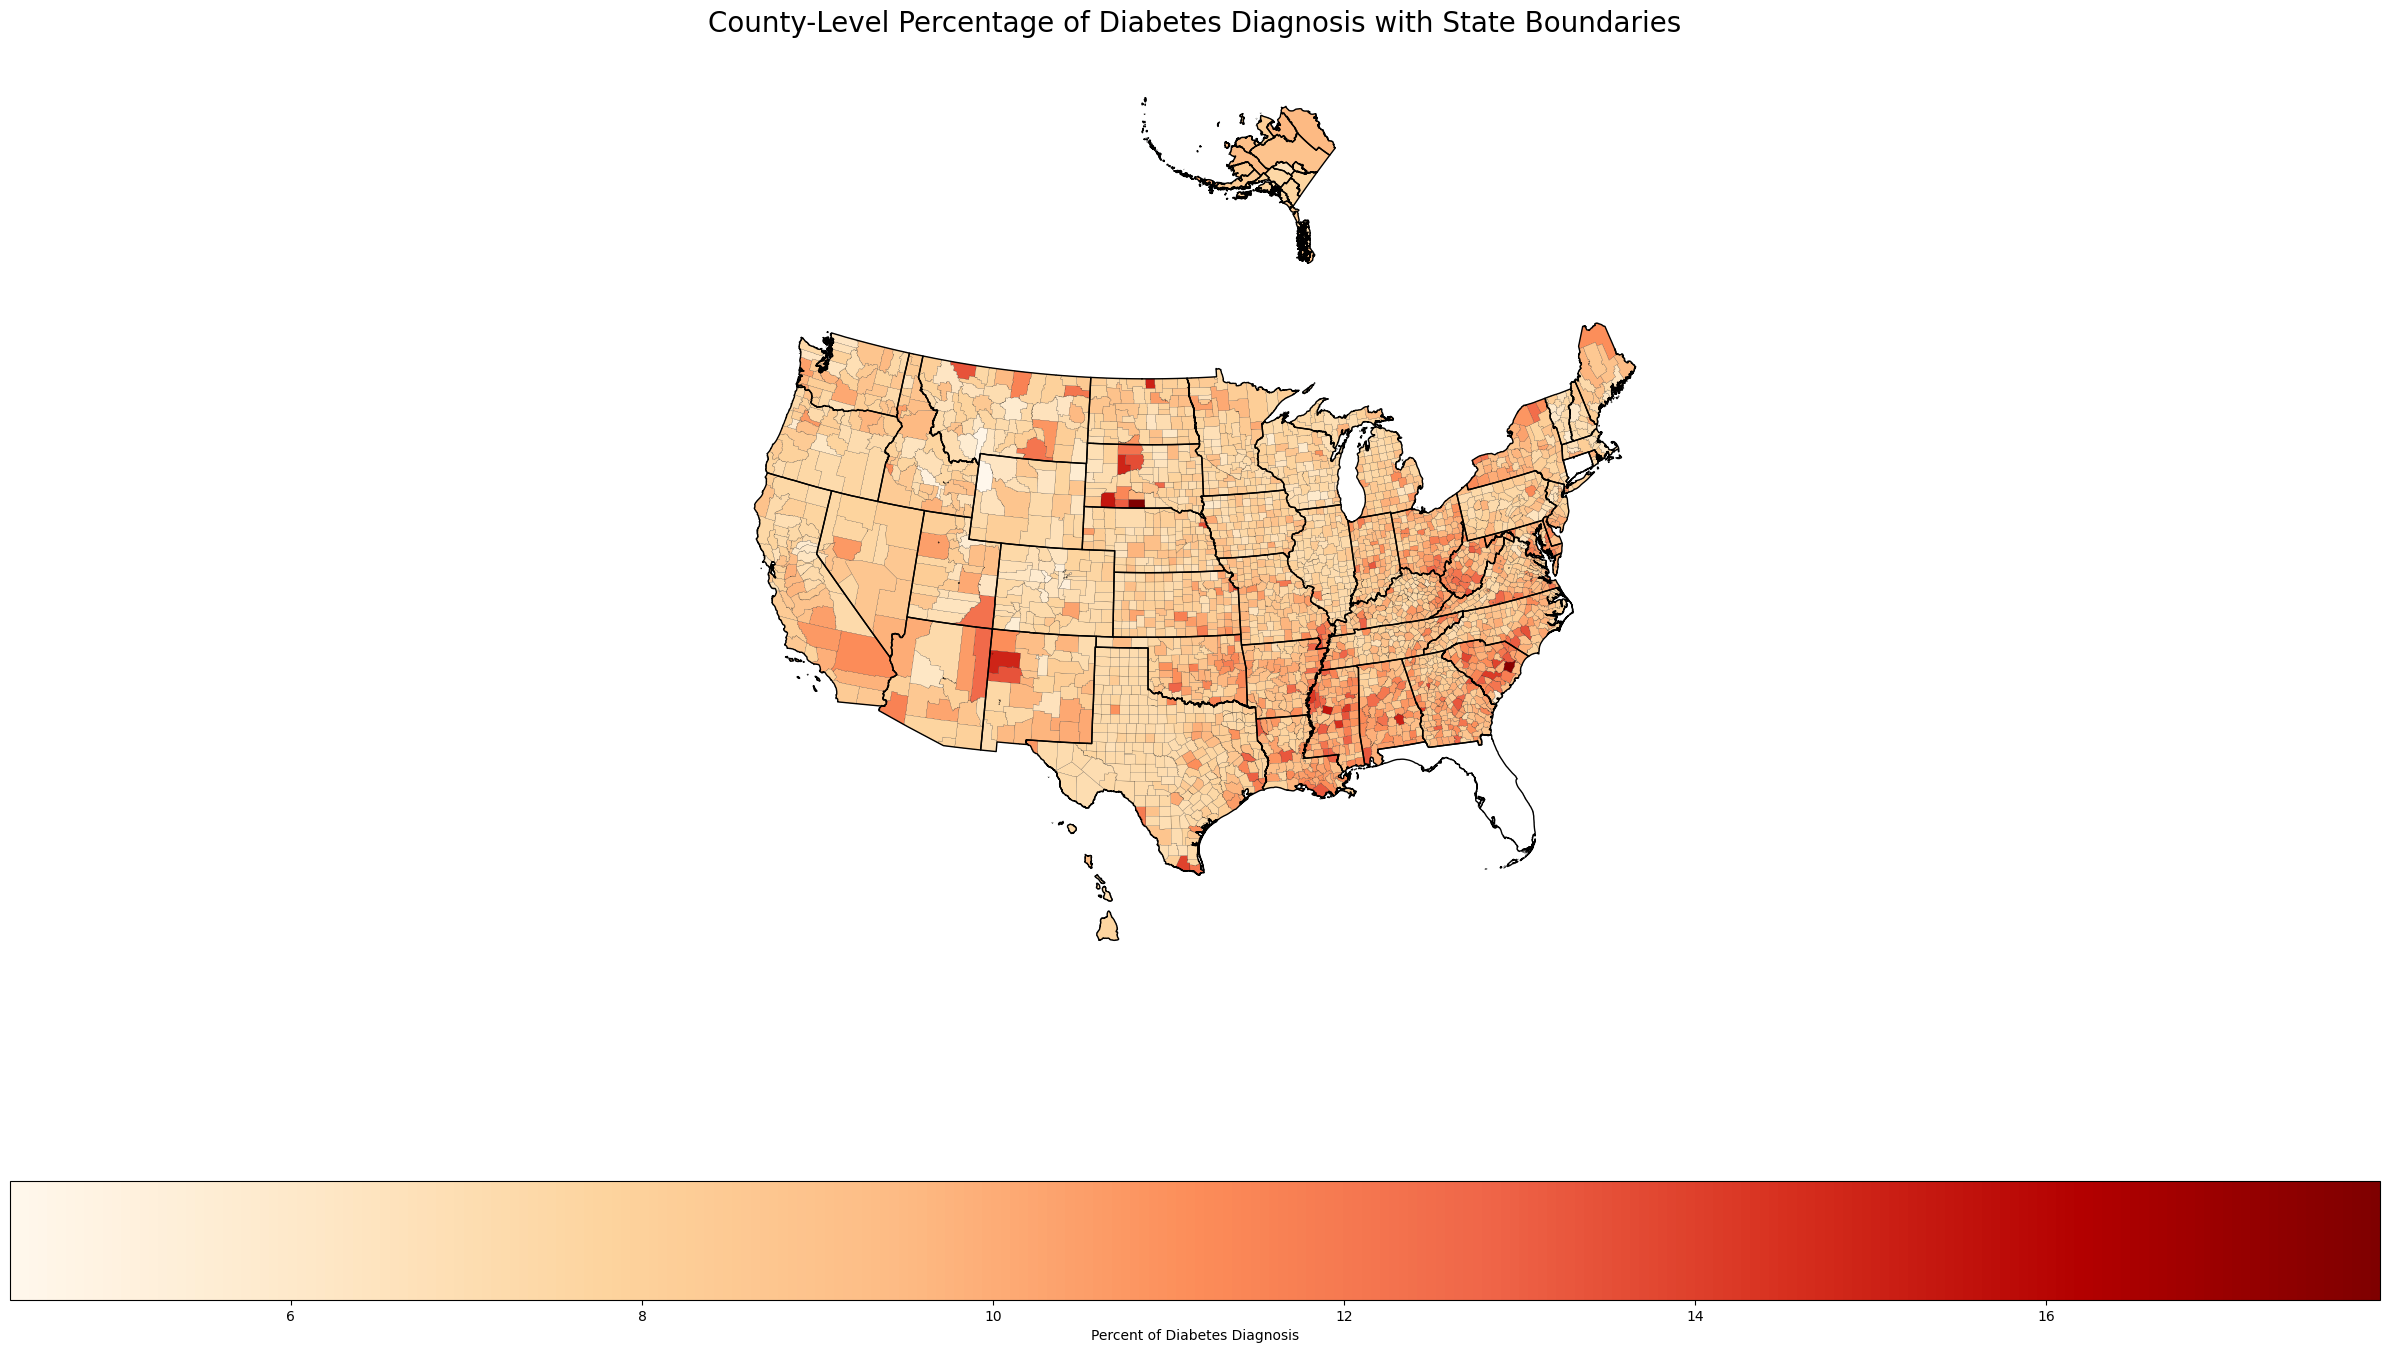

In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load county-level shapefile
gdf_counties = gpd.read_file('cb_2022_us_county_500k/cb_2022_us_county_500k.shp')

# Load state-level shapefile
gdf_states = gpd.read_file('cb_2022_us_state_500k/cb_2022_us_state_500k.shp')

# Ensure CountyFIPS in d_test is a zero-padded string
d_test['CountyFIPS'] = d_test['CountyFIPS'].astype(str).str.zfill(5)

# Merge shapefile with diabetes data
gdf_counties = gdf_counties.merge(d_test, how='left', left_on='GEOID', right_on='CountyFIPS')

# Exclude territories from counties and states
exclude_fps = ['72', '78', '69', '66', '60']
exclude_stusps = ['PR', 'GU', 'VI', 'MP', 'AS']

gdf_counties = gdf_counties[~gdf_counties['STATEFP'].isin(exclude_fps)]
gdf_states = gdf_states[~gdf_states['STUSPS'].isin(exclude_stusps)]

# Separate Alaska and Hawaii
alaska_counties = gdf_counties[gdf_counties['STATEFP'] == '02'].copy()
hawaii_counties = gdf_counties[gdf_counties['STATEFP'] == '15'].copy()
continental_counties = gdf_counties[~gdf_counties['STATEFP'].isin(['02', '15'])].copy()

alaska_states = gdf_states[gdf_states['STUSPS'] == 'AK'].copy()
hawaii_states = gdf_states[gdf_states['STUSPS'] == 'HI'].copy()
continental_states = gdf_states[~gdf_states['STUSPS'].isin(['AK', 'HI'])].copy()

# Project to coordinate system
continental_counties = continental_counties.to_crs("EPSG:2163")
alaska_counties = alaska_counties.to_crs("EPSG:2163")
hawaii_counties = hawaii_counties.to_crs("EPSG:2163")

continental_states = continental_states.to_crs("EPSG:2163")
alaska_states = alaska_states.to_crs("EPSG:2163")
hawaii_states = hawaii_states.to_crs("EPSG:2163")

# Transform Alaska and Hawaii
alaska_centroid = alaska_states.geometry.centroid.iloc[0]

alaska_counties.geometry = alaska_counties.geometry.scale(xfact=0.35, yfact=0.35, origin=alaska_centroid)
alaska_states.geometry = alaska_states.geometry.scale(xfact=0.35, yfact=0.35, origin=alaska_centroid)

# alaska_counties.geometry = alaska_counties.geometry.scale(xfact=0.35, yfact=0.35, origin='center')
alaska_counties.geometry = alaska_counties.geometry.translate(xoff=3e6, yoff=-1.4e6)
hawaii_counties.geometry = hawaii_counties.geometry.translate(xoff=5.3e6, yoff=-1.4e6)

# alaska_states.geometry = alaska_states.geometry.scale(xfact=0.35, yfact=0.35, origin='center')
alaska_states.geometry = alaska_states.geometry.translate(xoff=3e6, yoff=-1.4e6)
hawaii_states.geometry = hawaii_states.geometry.translate(xoff=5.3e6, yoff=-1.4e6)

# Combine counties and states
all_counties = pd.concat([continental_counties, alaska_counties, hawaii_counties])
all_states = pd.concat([continental_states,  alaska_counties, hawaii_states])

# Plotting
fig, ax = plt.subplots(figsize=(24, 14))  # Wider and taller
all_counties.plot(
    column='Percentage_int',
    cmap='OrRd',
    ax=ax,
    edgecolor='black',
    linewidth=0.1,
    legend=True,
    legend_kwds={'label': "Percent of Diabetes Diagnosis", 'orientation': "horizontal"}
)

# Overlay state boundaries
all_states.boundary.plot(ax=ax, color='black', linewidth=1)

# Final styling
plt.title('County-Level Percentage of Diabetes Diagnosis with State Boundaries', fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()



In [24]:
d_sort = d_test.sort_values('Percentage_int', ascending = False)
d_sort.groupby('State').max()[['County','Percentage_int']][:5]
top_counties = d_sort.loc[d_sort.groupby('State')['Percentage_int'].idxmax()]
top_counties.sort_values('Percentage_int', ascending = False)[:10][['County','State','Percentage_int']]

,County,State,Percentage_int
3150,Todd County,South Dakota,17.9
3149,Williamsburg County,South Carolina,17.5
3148,Portsmouth City,Virginia,16.8
3147,Holmes County,Mississippi,15.5
3144,Montgomery County,Alabama,15.0
3145,Rolette County,North Dakota,15.0
3142,Mckinley County,New Mexico,14.9
3137,Wyandotte County,Kansas,14.0
3136,Muscogee County,Georgia,14.0
3135,Hidalgo County,Texas,13.9


In [25]:
d_sort[d_sort['State'] == 'Alabama']

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,no_percentage,Percentage_int
3144,Montgomery County,Alabama,01101,15,12.3,17.7,False,15.0
3116,Mobile County,Alabama,01097,13.3,11.6,15.2,False,13.3
3080,Tuscaloosa County,Alabama,01125,12.5,10.3,14.9,False,12.5
3072,Dallas County,Alabama,01047,12.3,8.8,15.9,False,12.3
3048,Jefferson County,Alabama,01073,12,10.6,13.5,False,12.0
...,...,...,...,...,...,...,...,...
1374,Marion County,Alabama,01093,8,5.2,11.7,False,8.0
1181,Henry County,Alabama,01067,7.8,5,11.1,False,7.8
875,Fayette County,Alabama,01057,7.5,4.7,10.8,False,7.5
876,Franklin County,Alabama,01059,7.5,5,10.9,False,7.5


In [27]:
codes = pd.read_csv('codes.csv', encoding = 'latin_1')
codes
want = codes[codes['Attribute'] == 'RUCC_2023']
want[want['County_Name'] == 'Montgomery County']

,FIPS,State,County_Name,Attribute,Value
151,1101,AL,Montgomery County,RUCC_2023,2
481,5097,AR,Montgomery County,RUCC_2023,8
1474,13209,GA,Montgomery County,RUCC_2023,9
1993,17135,IL,Montgomery County,RUCC_2023,6
2257,18107,IN,Montgomery County,RUCC_2023,6
2578,19137,IA,Montgomery County,RUCC_2023,6
2857,20125,KS,Montgomery County,RUCC_2023,7
3244,21173,KY,Montgomery County,RUCC_2023,6
3628,24031,MD,Montgomery County,RUCC_2023,1
4354,28097,MS,Montgomery County,RUCC_2023,9


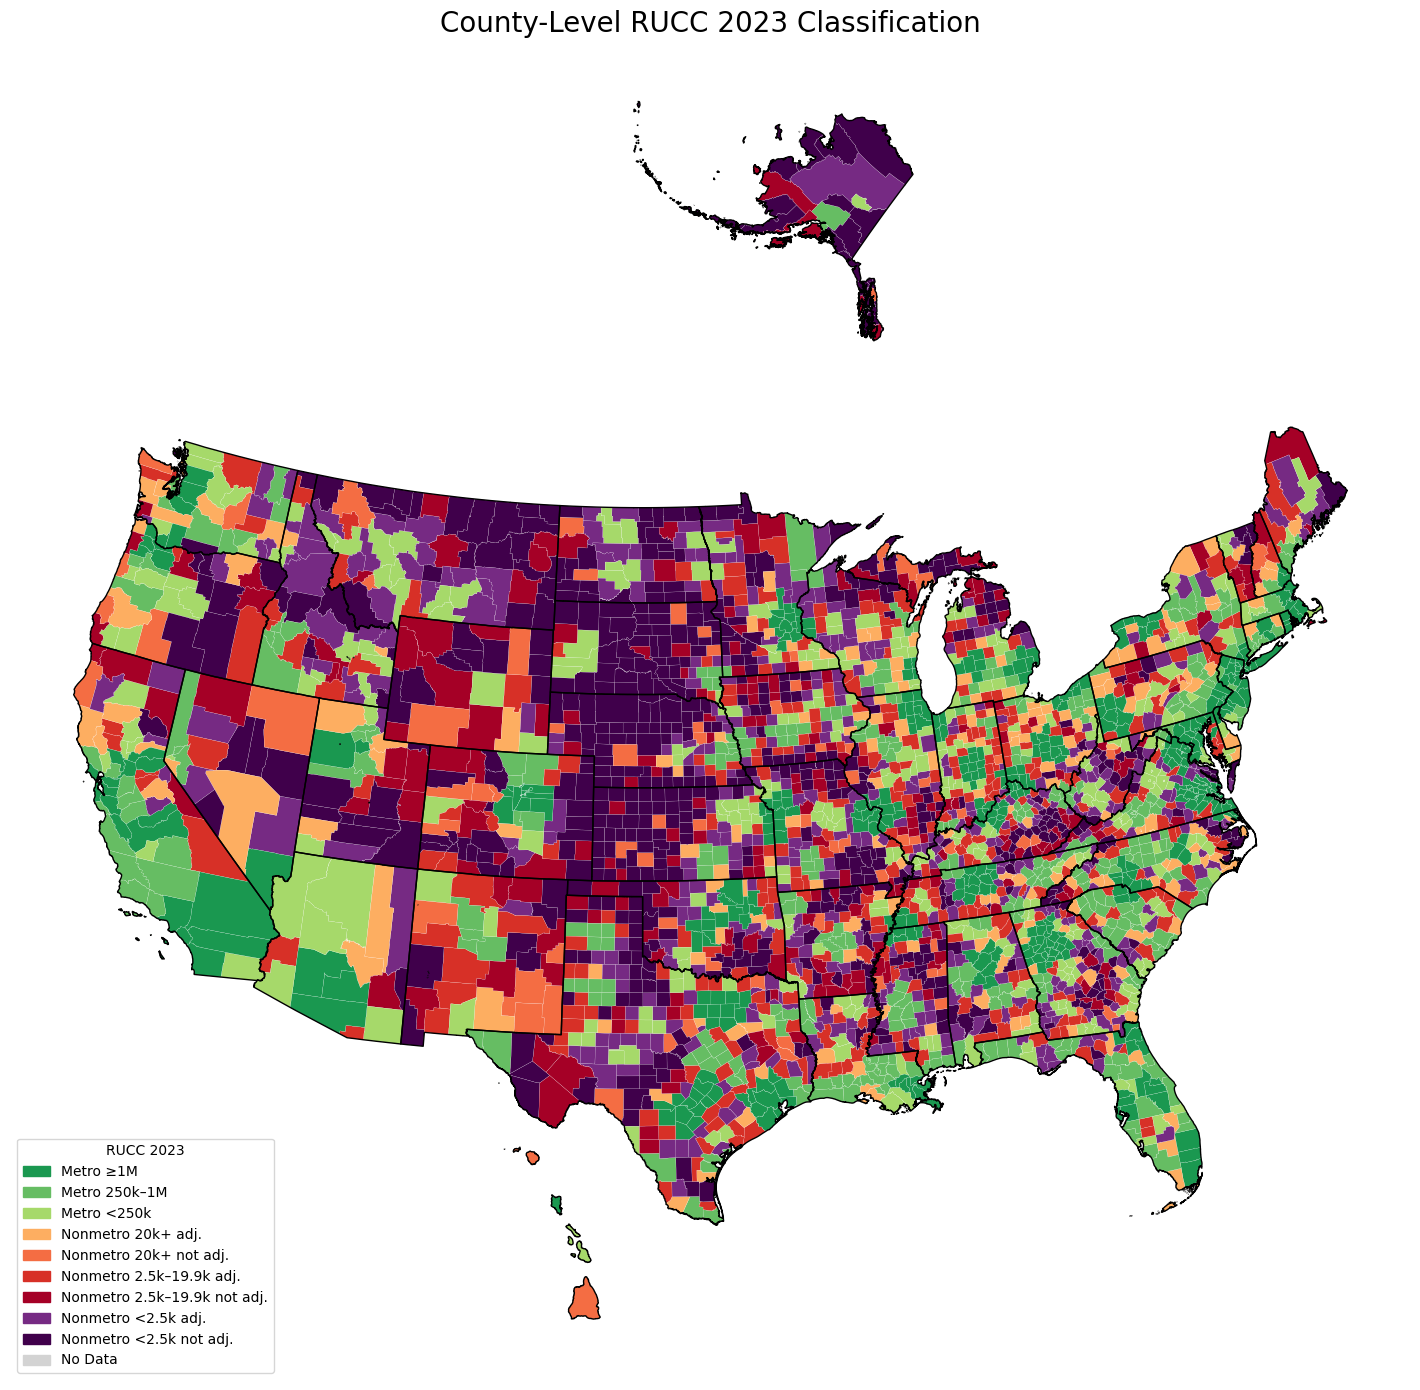

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load shapefiles
gdf_counties = gpd.read_file('cb_2022_us_county_500k/cb_2022_us_county_500k.shp')
gdf_states = gpd.read_file('cb_2022_us_state_500k/cb_2022_us_state_500k.shp')

# Load and prep RUCC data
codes = pd.read_csv('codes.csv', encoding='latin_1')
want = codes[codes['Attribute'] == 'RUCC_2023'].copy()
want['FIPS'] = want['FIPS'].astype(str).str.zfill(5)

# Merge RUCC codes into county shapefile
gdf_counties = gdf_counties.merge(want, how='left', left_on='GEOID', right_on='FIPS')

# Exclude territories
exclude_fps = ['72', '78', '69', '66', '60']
exclude_stusps = ['PR', 'GU', 'VI', 'MP', 'AS']
gdf_counties = gdf_counties[~gdf_counties['STATEFP'].isin(exclude_fps)]
gdf_states = gdf_states[~gdf_states['STUSPS'].isin(exclude_stusps)]

# Separate Alaska & Hawaii
alaska_counties = gdf_counties[gdf_counties['STATEFP'] == '02'].copy()
hawaii_counties = gdf_counties[gdf_counties['STATEFP'] == '15'].copy()
continental_counties = gdf_counties[~gdf_counties['STATEFP'].isin(['02', '15'])].copy()

alaska_states = gdf_states[gdf_states['STUSPS'] == 'AK'].copy()
hawaii_states = gdf_states[gdf_states['STUSPS'] == 'HI'].copy()
continental_states = gdf_states[~gdf_states['STUSPS'].isin(['AK', 'HI'])].copy()

# Project coordinate system
for gdf in [continental_counties, alaska_counties, hawaii_counties,
            continental_states, alaska_states, hawaii_states]:
    gdf.to_crs("EPSG:2163", inplace=True)

# Transform Alaska and Hawaii
alaska_centroid = alaska_states.geometry.centroid.iloc[0]
alaska_counties.geometry = alaska_counties.geometry.scale(0.35, 0.35, origin=alaska_centroid).translate(xoff=3e6, yoff=-1.4e6)
alaska_states.geometry = alaska_states.geometry.scale(0.35, 0.35, origin=alaska_centroid).translate(xoff=3e6, yoff=-1.4e6)
hawaii_counties.geometry = hawaii_counties.geometry.translate(xoff=5.3e6, yoff=-1.4e6)
hawaii_states.geometry = hawaii_states.geometry.translate(xoff=5.3e6, yoff=-1.4e6)

# Combine counties and states
all_counties = pd.concat([continental_counties, alaska_counties, hawaii_counties])
all_states = pd.concat([continental_states, alaska_states, hawaii_states])

# RUCC color map and descriptions
rucc_colors = {
    1: '#1a9850',  # Metro - 1 million or more
    2: '#66bd63',  # Metro - 250,000 to 1 million
    3: '#a6d96a',  # Metro - fewer than 250,000
    4: '#fdae61',  # Nonmetro - urban pop 20,000+, adjacent to metro
    5: '#f46d43',  # Nonmetro - urban pop 20,000+, not adjacent
    6: '#d73027',  # Nonmetro - urban pop 2,500–19,999, adjacent
    7: '#a50026',  # Nonmetro - urban pop 2,500–19,999, not adjacent
    8: '#762a83',  # Nonmetro - less than 2,500, adjacent
    9: '#40004b',  # Nonmetro - less than 2,500, not adjacent
}
rucc_descriptions = {
    1: 'Metro ≥1M',
    2: 'Metro 250k–1M',
    3: 'Metro <250k',
    4: 'Nonmetro 20k+ adj.',
    5: 'Nonmetro 20k+ not adj.',
    6: 'Nonmetro 2.5k–19.9k adj.',
    7: 'Nonmetro 2.5k–19.9k not adj.',
    8: 'Nonmetro <2.5k adj.',
    9: 'Nonmetro <2.5k not adj.',
    'No Data': 'No Data'
}

# Assign color to each county
all_counties['Value'] = pd.to_numeric(all_counties['Value'], errors='coerce')
all_counties['rucc_color'] = all_counties['Value'].map(rucc_colors).fillna('lightgray')

# Plotting
fig, ax = plt.subplots(figsize=(24, 14))
all_counties.plot(
    color=all_counties['rucc_color'],
    edgecolor='white',
    linewidth=0.1,
    ax=ax
)

# Overlay state boundaries
all_states.boundary.plot(ax=ax, color='black', linewidth=1)

# Custom legend
legend_patches = [
    mpatches.Patch(color=color, label=rucc_descriptions[val])
    for val, color in rucc_colors.items()
]
legend_patches.append(mpatches.Patch(color='lightgray', label='No Data'))
ax.legend(handles=legend_patches, title="RUCC 2023", loc='lower left', fontsize=10)

plt.title('County-Level RUCC 2023 Classification', fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()
